In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pbn import operations as ops
from pbn import conversions as convert
%matplotlib inline

In [88]:
import matplotlib.image as matimg
img_rgb = matimg.imread('/Users/eczech/Downloads/afremov_pallete.png')
img_rgb.shape

(558, 770, 4)

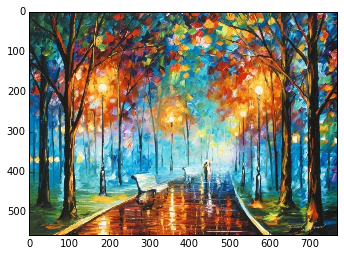

In [89]:
plt.imshow(img_rgb[:,:,:3])

In [ ]:
#img_lab = convert.rgb_to_lab(img_rgb)
#df_lab = ops.unravel(img_lab)
df_lab = ops.unravel(img_rgb[:,:,:3], color_cols=['r', 'g', 'b'])
df_lab.head()

In [97]:
df_counts = df_lab\
    .applymap(lambda x: x)\
    .groupby(['r', 'g', 'b']).size()\
    .reset_index(name='count')\
    .sort('count', ascending=False)
df_counts.head(10)

,r,g,b,count
29248,0.113725,0.113725,0.105882,120
23741,0.098039,0.098039,0.098039,112
27814,0.109804,0.109804,0.101961,106
30714,0.117647,0.125490,0.121569,105
32149,0.121569,0.129412,0.125490,101
26415,0.105882,0.105882,0.098039,100
25038,0.101961,0.101961,0.101961,97
30690,0.117647,0.117647,0.109804,92
22449,0.094118,0.094118,0.094118,91
25058,0.101961,0.109804,0.105882,85


In [117]:
common_1 = np.array([
    [255, 0, 0],
    [255, 128, 0],
    [255, 255, 0],
    [128, 255, 0],
    [0, 255, 0],
    [0, 255, 128],
    [0, 255, 255],
    [0, 128, 255],
    [0, 0, 255],
    [127, 0, 255],
    [255, 0, 255],
    [255, 0, 127],
    [128, 128, 128],
    [0, 0, 0],
    [255, 255, 255]
])

In [119]:
from pbn import palettes
alpha = .004
palette = pd.DataFrame(common_1)
palette /= 255.
palette = palette.apply(convert._rgb_to_lab, axis=1).apply(pd.Series)
palette *= alpha

# back to rgb
palette /= alpha
palette = palette.apply(convert._lab_to_rgb, axis=1).apply(pd.Series)
#palette *= 255
#palette = np.floor(palette)
palette

,0,1,2
0,0.982309,0.000000,0.025760
1,0.976081,0.504545,0.000000
2,0.953002,1.007334,0.000000
3,0.414758,1.007859,0.000000
4,0.000000,1.008003,0.000000
5,0.000000,1.006427,0.492343
6,0.220317,1.000673,0.999124
7,0.331546,0.487930,1.002815
8,0.355222,0.000000,1.003828
9,0.590358,0.000000,1.004013


In [121]:
convert._lab_to_rgb((100, 0, 0))

(1.0000345380490767, 0.9999940399170156, 0.9999354297584101)

0    0.982309
1    0.000000
2    0.025760
Name: 0, dtype: float64
0    0.976081
1    0.504545
2    0.000000
Name: 1, dtype: float64
0    0.953002
1    1.007334
2    0.000000
Name: 2, dtype: float64


ValueError: to_rgba: Invalid rgba arg "0    0.953002
1    1.007334
2    0.000000
Name: 2, dtype: float64"
number in rbg sequence outside 0-1 range

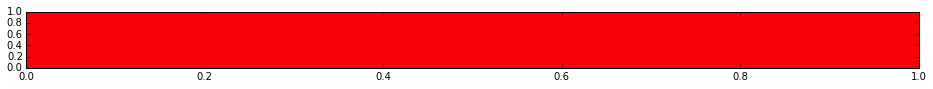

In [123]:
import matplotlib

fig = plt.figure()
fig.set_size_inches((16,1))
ax = fig.add_subplot(111)
width, height = 1000, 200
interval = int(float(width) / len(colors))
i = -1
for _, v in palette.iterrows():
    i += 1
    offset = i * interval
    print(v)
    rect = matplotlib.patches.Rectangle((offset,0), interval, height, color=v)
    ax.add_patch(rect)
plt.xlim([0, width])
plt.ylim([0, height])